In [1]:
%matplotlib inline 
   
import ipywidgets as widgets    
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

from IPython.display import clear_output

In [2]:

# AgastFeatureDetector::create(
# int 
# threshold = 10, 
# bool 
# nonmaxSuppression = true, 
# int 
# type = AgastFeatureDetector::OAST_9_16 
# )


In [6]:
img = cv2.imread('chess.png') # Sudoku
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


threshold:


A Jupyter Widget

nonmaxSuppression:


A Jupyter Widget

Total Keypoints: 
1236


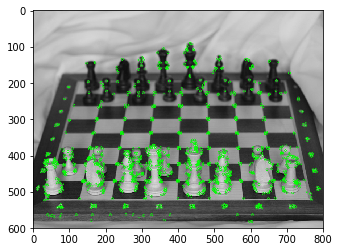

In [7]:
print('threshold:')
wThreshold = widgets.IntSlider(
    value=40,
    min=2,
    max=100,
    step=1,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
display(wThreshold)

print('nonmaxSuppression:')
wNonmaxSuppression = widgets.Checkbox(
    value=False,
    disabled=False
)
display(wNonmaxSuppression)


def paramsChanged(change):
    clear_output()

    print('threshold:')
    display(wThreshold)  
    print('nonmaxSuppression:')  
    display(wNonmaxSuppression)
    
    image = cv2.imread('chess.png') # Sudoku
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    try:
        agast = cv2.AgastFeatureDetector_create(wThreshold.value, wNonmaxSuppression.value)
        kp = agast.detect(gray, None)
        print("Total Keypoints: ")
        print(len(kp))
        imgCorners = cv2.drawKeypoints(gray, kp, None, color=(0,255,0))
        plt.imshow(imgCorners)
        plt.show()
        
    except:
        clear_output()
        print('Invalid parametres. Try again')
        print('threshold:')
        display(wThreshold)  
        print('nonmaxSuppression:')  
        display(wNonmaxSuppression)
        

wThreshold.observe(paramsChanged, names='value')
wNonmaxSuppression.observe(paramsChanged, names='value')